In [1]:
'''Importación de librerias necesarias para el Laboratorio'''
import pandas
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn import tree
from six import StringIO 
from IPython.display import Image 

El dataset consisten en información médica, análisis de laboratorio.

* Nº de Paciente
* Nivel de Azúcar en Sangre
* Edad
* Sexo
* Cociente de Creatinina (Cr)
* Índice de Masa Corporal (IMC)
* Urea
* Colesterol (Chol)
* Perfil de lípidos en ayunas
* LDL
* VLDL
* Triglicéridos (TG) 
* Colesterol HDL
* Clase HBA1C 

(La clase de enfermedad diabética del paciente puede ser diabético, no diabético o predictivo de diabetes).

In [2]:
'''Lectura de csv, mediante pandas'''
df = pandas.read_csv('DatasetofDiabetes.csv') 
'''Impresión del estado del dataset'''
print(df) 

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0    24.0     N  
1    23.0     N

In [3]:
'''Reemplazo de letras a números para el juego con datos estadísticos, donde "N" es 0 (no diabetico), "Y" es 1 (diabeticio) y "P" 2 (pre_diabetico)'''
df.CLASS = df.CLASS.replace({'N': 0, 'Y': 1,'N ': 0, 'Y ': 1,'P':2})
'''Impresión del estado del dataset'''
print(df)  

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1    23.0    

In [4]:
'''Reemplazo de los generos'''
df.Gender = df.Gender.replace({'M': 1, 'F': 0,'f': 0})
'''Impresión del estado del dataset'''
print(df)  

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1

In [5]:
'''Comprabación de variables objetivo '''
df.CLASS.value_counts()

1    844
0    103
2     53
Name: CLASS, dtype: int64

In [6]:
'''Visualización final de dataset'''
df.value_counts()

ID   No_Pation  Gender  AGE  Urea  Cr   HbA1c  Chol  TG   HDL  LDL  VLDL  BMI   CLASS
1    34325      1       56   20.8  800  9.0    4.6   2.0  1.2  2.5  0.9   35.0  1        1
472  463        1       34   3.9   81   6.0    6.2   3.9  0.8  1.9  1.8   23.0  2        1
459  48353      1       67   13.3  107  7.1    3.0   2.2  0.8  1.3  1.0   27.0  1        1
460  34398      1       55   8.6   73   10.2   3.9   2.0  1.5  1.5  0.9   31.0  1        1
461  48362      0       69   6.1   49   8.2    8.0   4.8  1.3  4.8  2.2   34.0  1        1
                                                                                        ..
170  24028      1       54   4.3   63   12.1   3.6   5.1  0.9  2.5  0.9   30.0  1        1
     45395      1       50   4.8   70   8.0    5.2   2.7  1.4  2.7  1.2   20.0  1        1
171  42329      0       79   5.2   54   9.2    6.4   3.0  1.1  4.1  1.3   30.0  1        1
     45434      1       40   22.0  159  5.4    3.1   1.6  1.1  1.3  0.7   24.0  0        1
800 

In [7]:
'''Determinar variables objetivo (dependientes) y características (independientes), ID y No_Pation 
fueron excluidas por no ser revelantes ni factibles para los procesimientos matemáticos'''
feature_cols = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL','LDL','VLDL','BMI']
'''X es la variable características'''
X = df[feature_cols] 
'''y es la variable objetivo'''
y = df.CLASS

In [8]:
'''División del data set en prueba y entrenamiento'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
'''Declaración de variables para la creación del DecisionTree'''
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
'''Declaración de la y_pred'''
y_pred = clf.predict(X_test)

In [9]:
'''Determinación del Accuracy mediante (y_test, y_pred)'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
'''Determinación del Precision mediante (y_test, y_pred)'''
print("Precision:", metrics.precision_score(y_test, y_pred,average='micro'))
'''Determinación del Recall mediante (y_test, y_pred)'''
print("Recall:", metrics.recall_score(y_test, y_pred,average='macro'))  

Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9009589947089948


# Visualizing the tree

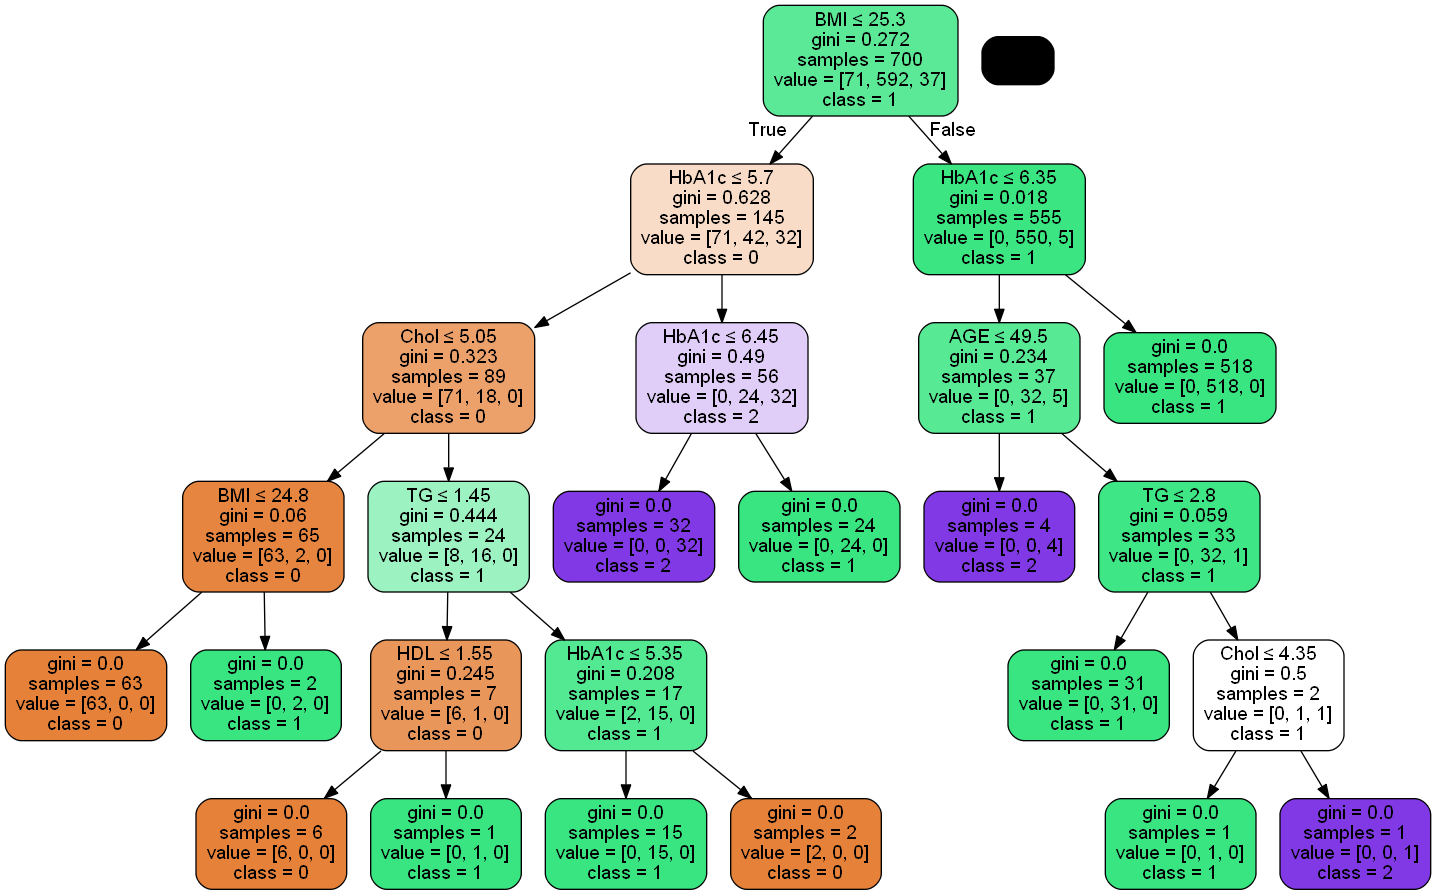

In [10]:
'''Visualización del árbol de decisión completo mostrando su raíz, ramas y nodos'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
'''Guardar imagen en el local'''
graph.write_png('diabetes.png')
'''Presentación de la imagen'''
Image(graph.create_png())